In [83]:
import numpy
import scipy.special #sigmoid function expit()

import matplotlib.pyplot as plt
%matplotlib inline 
#to plot inline

In [84]:
#definição da classe Rede Neural
class NeuralNet:
    
    #inicializar a rede
    def __init__(self, inputN, hiddenN, outputN, learningR):
        
        #Configurar o numero de nós em cada camada
        self.inodes = inputN
        self.hnodes = hiddenN
        self.onodes = outputN
        
        #taxa de aprendizado
        self.lr = learningR
        
        #WEIGHTS
        #Random weights from a normal probability distribution centred on zero
        #standard deviation = 1/srqt(incoming links)
        
        #numpy.random.normal(mean, spread, shape)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        #ACTIVATION FUNCTION
        self.activation_function = lambda x : scipy.special.expit(x)
        
        pass
    
    #treinar a rede
    def train(self, inputs_list, targets_list):
        #convertere para array2d numpy
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #PROPAGATION
        #signals hiddenl
        hi = numpy.dot(self.wih, inputs) #hidden inputs
        ho = self.activation_function(hi) #hidden outputs
        
        #signals outputL
        oi = numpy.dot(self.who, ho) #final inputs
        oo = self.activation_function(oi) #final outputs
        
        #BACKpropagation
        #ERRORS
        output_errors = targets - oo #error = (target - actual)
        hidden_errors = numpy.dot(self.who.T, output_errors) #ErrorsH = who.T dot errorsOut
        
        #UPDATING WEIGHTS
        self.who += self.lr * numpy.dot((output_errors * oo * (1.0 - oo)), numpy.transpose(ho))
        self.wih += self.lr * numpy.dot((hidden_errors * ho * (1.0 - ho)), numpy.transpose(inputs))
        pass
    
    #resposta depois de treinada
    def query(self, inputs_list):
        
        #Convertendo inputs para Array2d
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #INPUT --> HIDDEN
        #Hidden input calculation
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        #Hidden outputs (activation function)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #HIDDEN --> OUTPUT
        #signals into the final layer (output layer)
        output_inputs = numpy.dot(self.who, hidden_outputs)
        #signals out the final layer (output layer)
        output_outputs = self.activation_function(output_inputs)
        
        return output_outputs

In [119]:
#printing images forfun
def printandoimagem(n):
    print("Label: ", n[0])
    n = numpy.asfarray(n[1:]).reshape((28,28))
    plt.imshow(n, cmap='Greys', interpolation='None')

In [120]:
owndataset = []

In [121]:
#Carregando e tratando imagens
import imageio # bib para carregar imagens png
import glob # bib que ajuda a lidar com varios arquivos

for image in glob.glob('imagens/png_*.png'):
    print("Carregando...:", image)
    
    #getting label from the string "abc_8.png" -> 8
    label = int(image[-5:-4])
    print(label)
    
    #lendo a ibagem
    img_array = imageio.imread(image, as_gray=True)
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    #apprend label and image data to the owntest dataset
    record = numpy.append(label, img_data)
    owndataset.append(record)

Carregando...: imagens\png_3.png
3
Carregando...: imagens\png_7.png
7
Carregando...: imagens\png_8.png
8
Carregando...: imagens\png_9.png
9
Carregando...: imagens\png_a9.png
9


Label:  3.0


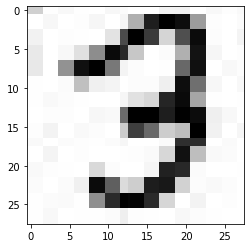

In [124]:
printandoimagem(owndataset[0])

Label:  7.0


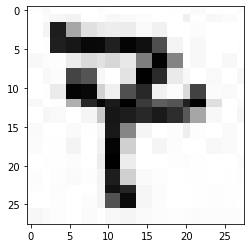

In [125]:
printandoimagem(owndataset[1])

Label:  8.0


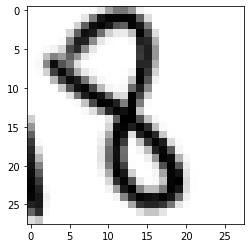

In [126]:
printandoimagem(owndataset[2])

Label:  9.0


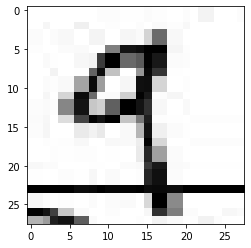

In [127]:
printandoimagem(owndataset[3])

Label:  9.0


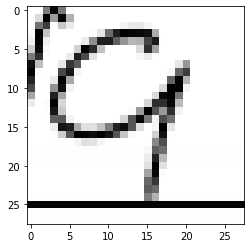

In [128]:
printandoimagem(owndataset[4])

In [130]:
#gravanado imagens num arquivo csv
import csv

In [131]:
with open('meu_dataset.csv', 'w', newline='') as f:
    thewritter = csv.writer(f)
    
    for row in owndataset:
        thewritter.writerow(row)